In this notebook, we try to learn the
inverse to the pytorch `torch.nn.functional.one_hot` function.

### Import libraries

In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import pathlib
import sys

import einops
import git
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pytorch_lightning as pl
import torch
from torch import nn

GIT_ROOT = pathlib.Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
GIT_ROOT

PosixPath('/home2/gridsan/twang/code/grokking')

In [15]:
sys.path.append("..")
from grokk_replica.one_hot_inverse import dataset
from grokk_replica.one_hot_inverse.model import OneHotFCNet, OneHotFCNetConfig

### Initialize data and model

In [16]:
ds = dataset.OneHotDS(cfg=dataset.OneHotDSConfig(n_classes=96))
dm = dataset.InfiniteDM(ds=ds, cfg=dataset.InfiniteDMConfig(n_workers=8))

In [17]:
pl.seed_everything(42)
xs_tmp, ys_tmp = next(iter(dm.train_dataloader()))
print(xs_tmp.shape, ys_tmp.shape)
xs_tmp[0], ys_tmp[0]

Global seed set to 42


torch.Size([512, 96]) torch.Size([512])


(tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.]),
 tensor(0.5833))

# Do training

In [18]:
class CustomCallback(pl.Callback):
    def __init__(self):
        super().__init__()
        self.metric_history: list[dict[str, float]] = []

    def on_train_batch_end(self, trainer: pl.Trainer, *_, **__):
        self.metric_history.append(
            {k: v.item() for k, v in trainer.logged_metrics.items()}
        )

def train_model(
    model: pl.LightningModule,
    dm: pl.LightningDataModule,
    max_steps: int,
) -> pd.DataFrame:
    """Returns metric history."""
    cc = CustomCallback()
    pl.Trainer(
        gpus=1,
        deterministic=True,
        logger=False,  # We do custom logging instead.
        log_every_n_steps=1,
        max_steps=max_steps,
        enable_progress_bar=True,
        enable_model_summary=False,
        enable_checkpointing=False,
        callbacks=[cc],
    ).fit(
        model=model,
        datamodule=dm,
    )

    return pd.DataFrame(cc.metric_history)

### Depth 1

Global seed set to 42
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training: 0it [00:00, ?it/s]

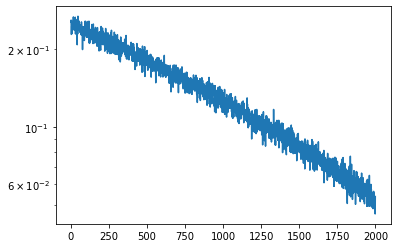

In [19]:
pl.seed_everything(42)
model1 = OneHotFCNet(cfg=OneHotFCNetConfig(
    n_classes=ds.cfg.n_classes,
    hidden_width=ds.cfg.n_classes,
    depth=1,
    opt_type="adamw",
    learning_rate=1e-4,
))
mh1 = train_model(model=model1, dm=dm, max_steps=2000)

mh1.mse.plot()
plt.yscale("log")

Global seed set to 42
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training: 0it [00:00, ?it/s]

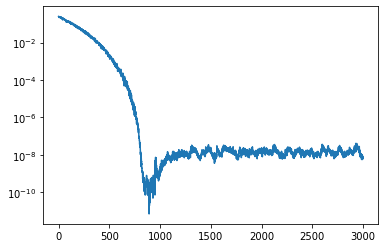

In [20]:
pl.seed_everything(42)
model2 = OneHotFCNet(cfg=OneHotFCNetConfig(
    n_classes=ds.cfg.n_classes,
    hidden_width=ds.cfg.n_classes,
    depth=1,
    opt_type="adamw",
    learning_rate=1e-3,
))
mh2 = train_model(model=model2, dm=dm, max_steps=3000)

mh2.mse.plot()
plt.yscale("log")

Global seed set to 42
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training: 0it [00:00, ?it/s]

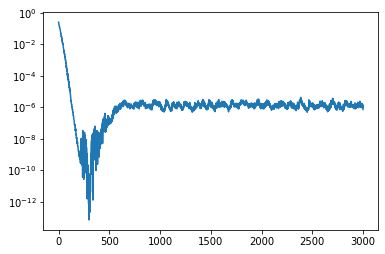

In [21]:
pl.seed_everything(42)
model3 = OneHotFCNet(cfg=OneHotFCNetConfig(
    n_classes=ds.cfg.n_classes,
    hidden_width=ds.cfg.n_classes,
    depth=1,
    opt_type="adamw",
    learning_rate=1e-2,
))
mh3 = train_model(model=model3, dm=dm, max_steps=3000)

mh3.mse.plot()
plt.yscale("log")

### Depth 2

Global seed set to 42
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training: 0it [00:00, ?it/s]

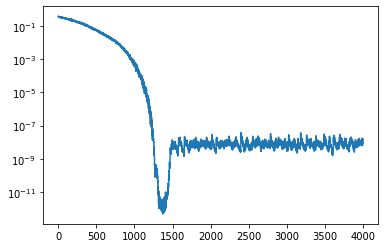

In [22]:
pl.seed_everything(42)
model4 = OneHotFCNet(cfg=OneHotFCNetConfig(
    n_classes=ds.cfg.n_classes,
    hidden_width=ds.cfg.n_classes,
    depth=2,
    opt_type="adamw",
    learning_rate=1e-4,
))
mh4 = train_model(model=model4, dm=dm, max_steps=4000)

mh4.mse.plot()
plt.yscale("log")

Global seed set to 42
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training: 0it [00:00, ?it/s]

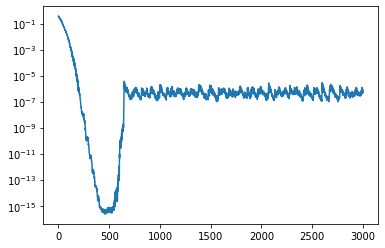

In [23]:
pl.seed_everything(42)
model5 = OneHotFCNet(cfg=OneHotFCNetConfig(
    n_classes=ds.cfg.n_classes,
    hidden_width=ds.cfg.n_classes,
    depth=2,
    opt_type="adamw",
    learning_rate=1e-3,
))
mh5 = train_model(model=model5, dm=dm, max_steps=3000)

mh5.mse.plot()
plt.yscale("log")

Global seed set to 42
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training: 0it [00:00, ?it/s]

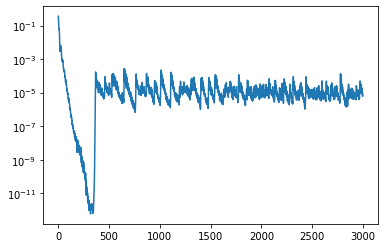

In [24]:
pl.seed_everything(42)
model6 = OneHotFCNet(cfg=OneHotFCNetConfig(
    n_classes=ds.cfg.n_classes,
    hidden_width=ds.cfg.n_classes,
    depth=2,
    opt_type="adamw",
    learning_rate=1e-2,
))
mh6 = train_model(model=model6, dm=dm, max_steps=3000)

mh6.mse.plot()
plt.yscale("log")